In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
dfproyecto=pd.read_csv(url)

In [3]:
dfproyecto.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
dfproyecto.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


<h2> Disminucion de Criterios <h2>

In [5]:
tempdf=dfproyecto[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB_MPG","CO2EMISSIONS"]]
tempdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,33,196
1,2.4,4,29,221
2,1.5,4,48,136
3,3.5,6,25,255
4,3.5,6,27,244


<h2> Revision de variables contra distribucion normal </h2>

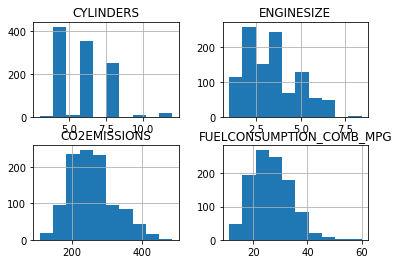

In [6]:
viz=tempdf[["CYLINDERS","ENGINESIZE","CO2EMISSIONS","FUELCONSUMPTION_COMB_MPG"]]
viz.hist()
plt.show()

<h2> Revision de variables contra grafico de dispersion </h2>

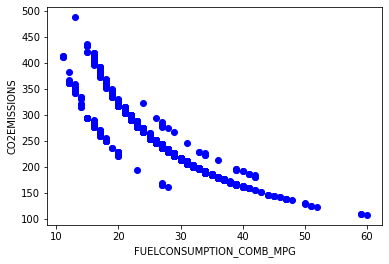

In [7]:
pl.scatter(tempdf.FUELCONSUMPTION_COMB_MPG,tempdf.CO2EMISSIONS,color="blue")
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2EMISSIONS")
plt.show()

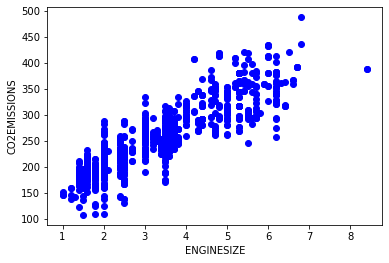

In [8]:
pl.scatter(tempdf.ENGINESIZE,tempdf.CO2EMISSIONS,color="blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

<h2> Crear set de entrenamiento y de prueba </h2>
    
<p> Consiste en tomar el set de datos original y dividirlo en 2 partes, la primera 80% para entrenar yel 20% para pruebas.</p>

In [9]:
msk=np.random.rand(len(tempdf))<0.8
train=tempdf[msk]
test=tempdf[~msk]

<h2> Graficar la distribucion del set de entrenamiento </h2>

<function matplotlib.pyplot.show(close=None, block=None)>

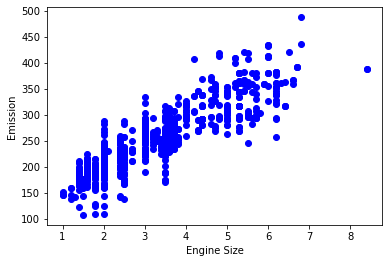

In [10]:
#Set de entrenamiento
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color="blue")
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show

<h2> Modelado de algorittmo de Regresion Lineal Simple <h2>

In [11]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
print ('coeficiente:', regr.coef_)
print ('intercepcion: ', regr.intercept_)


coeficiente: [[38.88383668]]
intercepcion:  [125.98738294]


Text(0, 0.5, 'Emision')

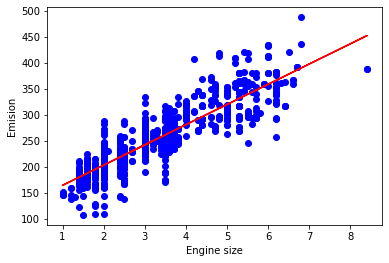

In [12]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color="blue")
plt.plot(train_x,regr.coef_[0][0]*train_x+regr.intercept_[0],"-r")
plt.xlabel("Engine size")
plt.ylabel("Emision")

<h2> Aplicacion de Prueba de Modelo </h2>

In [13]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y1=regr.predict(test_x)

print("MSE:%.2f" % np.mean(np.absolute(test_y1-test_y)))
print("MSE:%.2f" % np.mean((test_y1-test_y)**2))
print("R2:%.2f" % r2_score(test_y,test_y1))

MSE:24.70
MSE:1063.66
R2:0.75
